In [387]:
%matplotlib notebook
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import IPython
from IPython.display import display
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



Importing and exploring the data the data:

In [388]:
raw_df_red = pd.read_csv("winequality-red.csv", sep =';')
raw_df_white = pd.read_csv("winequality-white.csv", sep =';')
raw_df_red.head(2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [389]:
raw_df_red.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [400]:
raw_df_white.describe() # categories from 3 to 8

# raw_df_red.iloc[:,0:11]
#raw_df_white.describe() # categories from 3 to 9

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Since I want to predict the quality of wine, which is ordinal, 
I will use KNN model to predict the quality of red and white wine



In [391]:
X = raw_df_red.iloc[:,:-1].values
y = raw_df_red['quality'].values
X_train_red, X_test_red, y_train_red, y_test_red = cross_validation.train_test_split(X, y, test_size = 0.2, random_state = 0)


#X_train_white, X_test_white, y_train_white, y_test_white = cross_validation.train_test_split(raw_df_white.iloc[:,0:11], raw_df_white['quality'], test_size = 0.2 )




In [392]:
X_train_red
# y_train_red.describe()

array([[ 9.9 ,  0.54,  0.45, ...,  3.39,  0.62,  9.4 ],
       [10.8 ,  0.26,  0.45, ...,  3.13,  0.54,  9.6 ],
       [ 9.9 ,  0.35,  0.55, ...,  3.26,  0.79, 10.6 ],
       ...,
       [ 7.9 ,  0.57,  0.31, ...,  3.29,  0.69,  9.5 ],
       [13.  ,  0.47,  0.49, ...,  3.3 ,  0.68, 12.7 ],
       [ 9.8 ,  0.98,  0.32, ...,  3.25,  0.48,  9.4 ]])

Vissually exploring the data

In [393]:
#pd.plotting.scatter_matrix(X_train_red, c = y_train_red, figsize = (15, 15), marker ='o', hist_kwds = {'bins': 20},
 #                          s = 30, alpha = 0.7)

    # create a multidimensional scatter plot here: 


Fitting the model for the red wine dataset:

In [395]:
scaler = StandardScaler()

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
knn.fit(scaler.fit(X_train_red).transform(X_train_red), y_train_red)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [396]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
Xtr = scaler.fit(X_train_red).transform(X_train_red)
Xts = scaler.fit(X_test_red).transform(X_test_red)
X_train_pca = pca.fit_transform(Xtr)
X_test_pca = pca.transform(Xts)
explained_var = pca.explained_variance_ratio_
explained_var

array([0.28263119, 0.17942214, 0.1358536 , 0.10862763, 0.08692731,
       0.06008452, 0.0533286 ])

making predictions using the test set:

In [397]:
print("Predictions: {}".format(knn.predict(scaler.fit(X_test_red).transform(X_test_red))))

Predictions: [5 5 7 5 6 5 5 6 5 6 5 5 5 6 5 7 7 5 5 6 6 5 6 6 6 5 5 7 5 7 6 6 6 6 6 5 5
 5 6 7 5 7 7 6 6 5 5 5 6 6 5 5 5 6 6 5 5 5 6 6 5 5 6 6 5 6 5 5 7 5 5 5 5 6
 6 5 6 5 5 7 6 6 6 6 6 5 5 5 5 5 5 5 6 5 7 5 6 5 5 6 7 6 5 7 5 5 5 5 6 5 5
 5 7 5 5 6 6 7 5 6 5 7 5 5 6 7 5 5 5 6 5 5 6 6 6 5 6 5 6 5 6 5 5 6 5 5 7 7
 6 5 5 5 5 6 5 6 5 5 6 6 5 6 6 5 5 5 6 6 6 6 6 5 6 7 5 6 5 7 5 5 5 7 6 6 6
 6 5 5 5 6 6 5 6 6 5 5 5 5 5 5 5 6 6 5 5 5 5 6 6 6 6 6 5 7 5 5 6 7 6 5 5 6
 6 5 6 6 6 5 6 5 5 6 5 6 6 6 5 7 7 6 6 5 5 5 6 5 5 5 5 6 5 5 6 5 5 5 5 5 5
 6 5 6 6 6 5 5 5 5 5 5 5 5 6 6 6 6 7 5 6 7 6 6 5 6 6 5 5 5 7 6 6 4 6 6 5 6
 5 6 5 5 6 5 5 6 5 6 5 5 5 5 5 6 5 5 5 6 6 7 6 7]


Evaluating the accuracy of the model:

In [398]:
print("Test accuracy for knn whith 3 neighbors is : {} ".format(knn.score(scaler.fit(X_test_red).transform(X_test_red), y_test_red)))

scores = cross_val_score(knn, X = X_train_pca, y = y_train_red)
print ("Cross Validation Scores: {}".format(scores))

Test accuracy for knn whith 3 neighbors is : 0.60625 
Cross Validation Scores: [0.50934579 0.53521127 0.57411765]


In [399]:
expected   = y_test_red
predicted  = knn.predict(scaler.fit(X_test_red).transform(X_test_red))                    
classificationReport = classification_report(expected, predicted,  target_names =['3', '4', '5', '6', '7', '8'])
print(classificationReport)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        11
          5       0.62      0.76      0.68       135
          6       0.62      0.54      0.57       142
          7       0.52      0.59      0.55        27
          8       0.00      0.00      0.00         3

avg / total       0.58      0.61      0.59       320



c:\users\franc\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Choosing the number of neighbors, k:

<IPython.core.display.Javascript object>


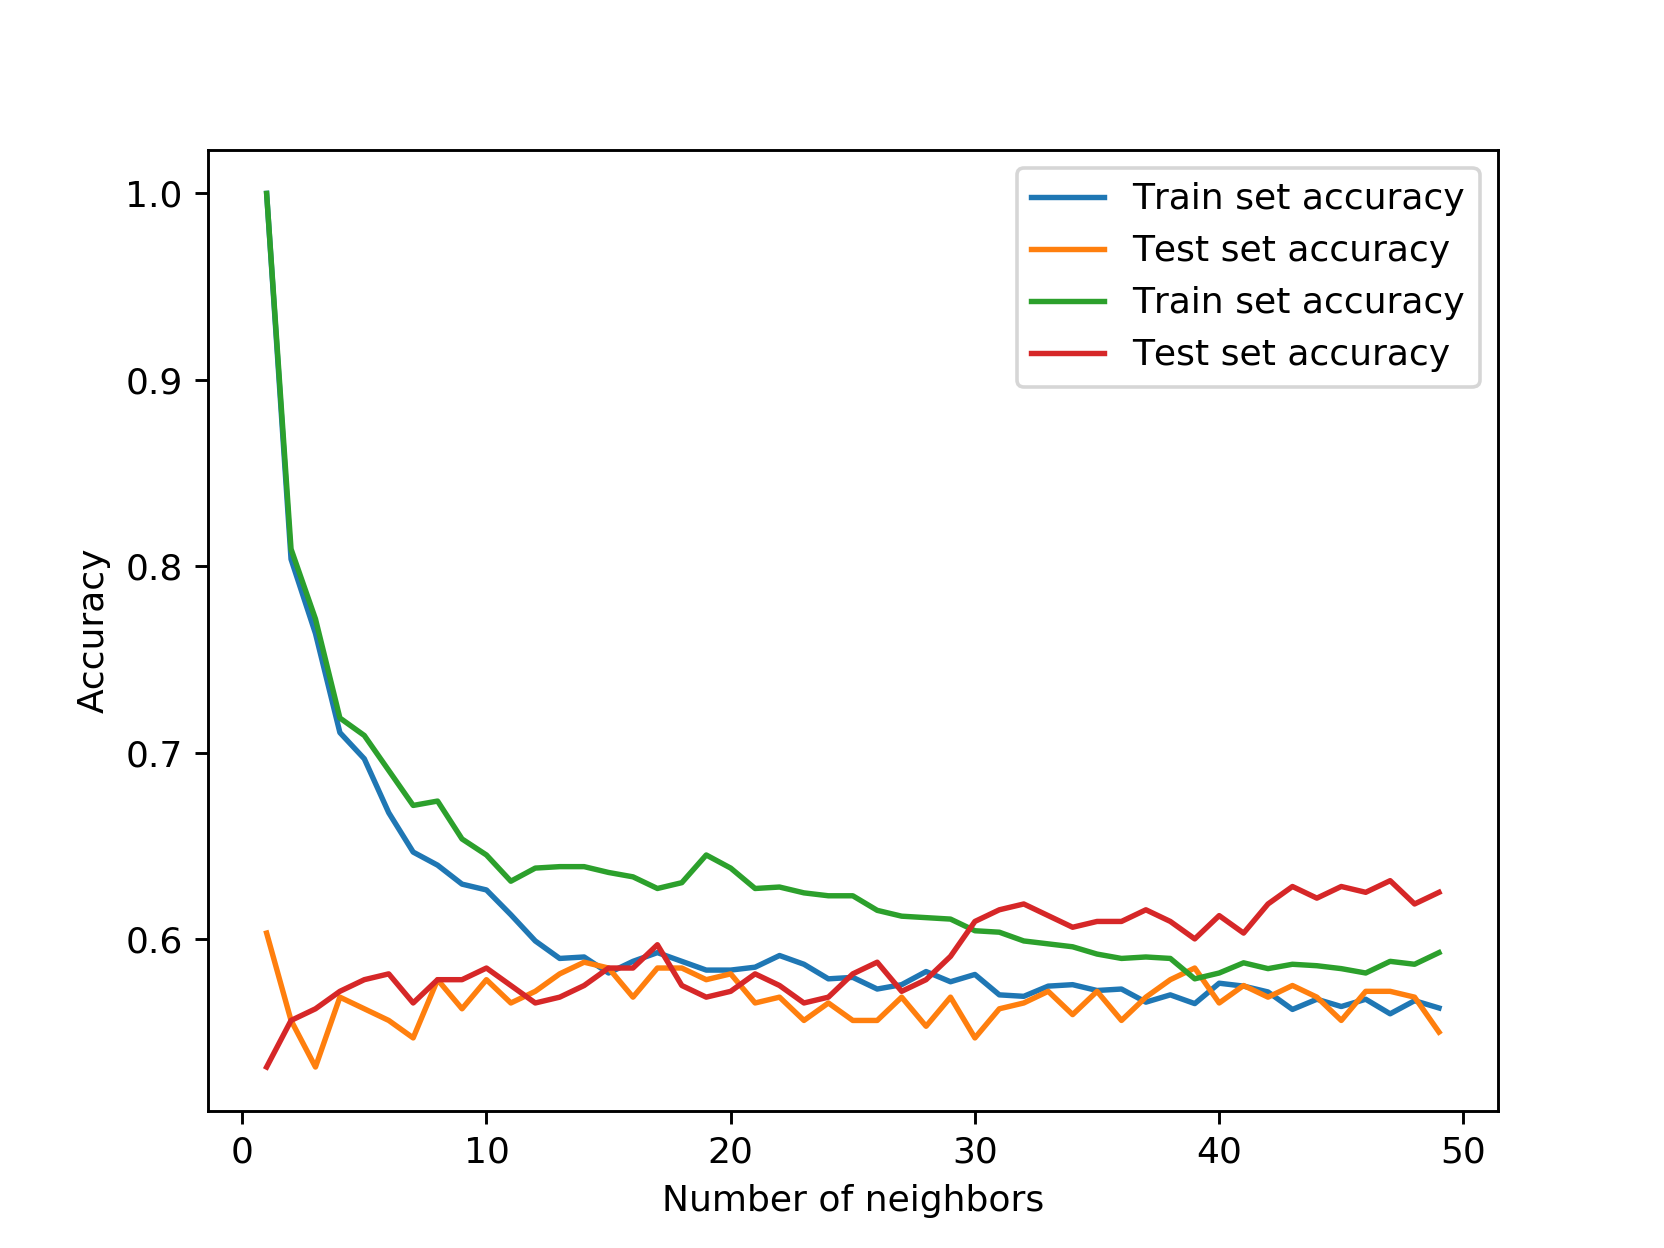

In [341]:
train_accuracy = []
test_accuracy = []

neighbors = range(1,50)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
    knn.fit(X_train_pca, y_train_red)
    train_accuracy.append(knn.score(X_train_pca, y_train_red))
    test_accuracy.append(knn.score(X_test_pca, y_test_red))
plt.plot(neighbors, train_accuracy, label = 'Train set accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test set accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
plt.show()


According to the plot. Maximum accuracy of the model is 0.56 using 26 neighbors, in the next section I will repeat the same process using a MinMax scaler and test the accuracy of the model again.

<IPython.core.display.Javascript object>


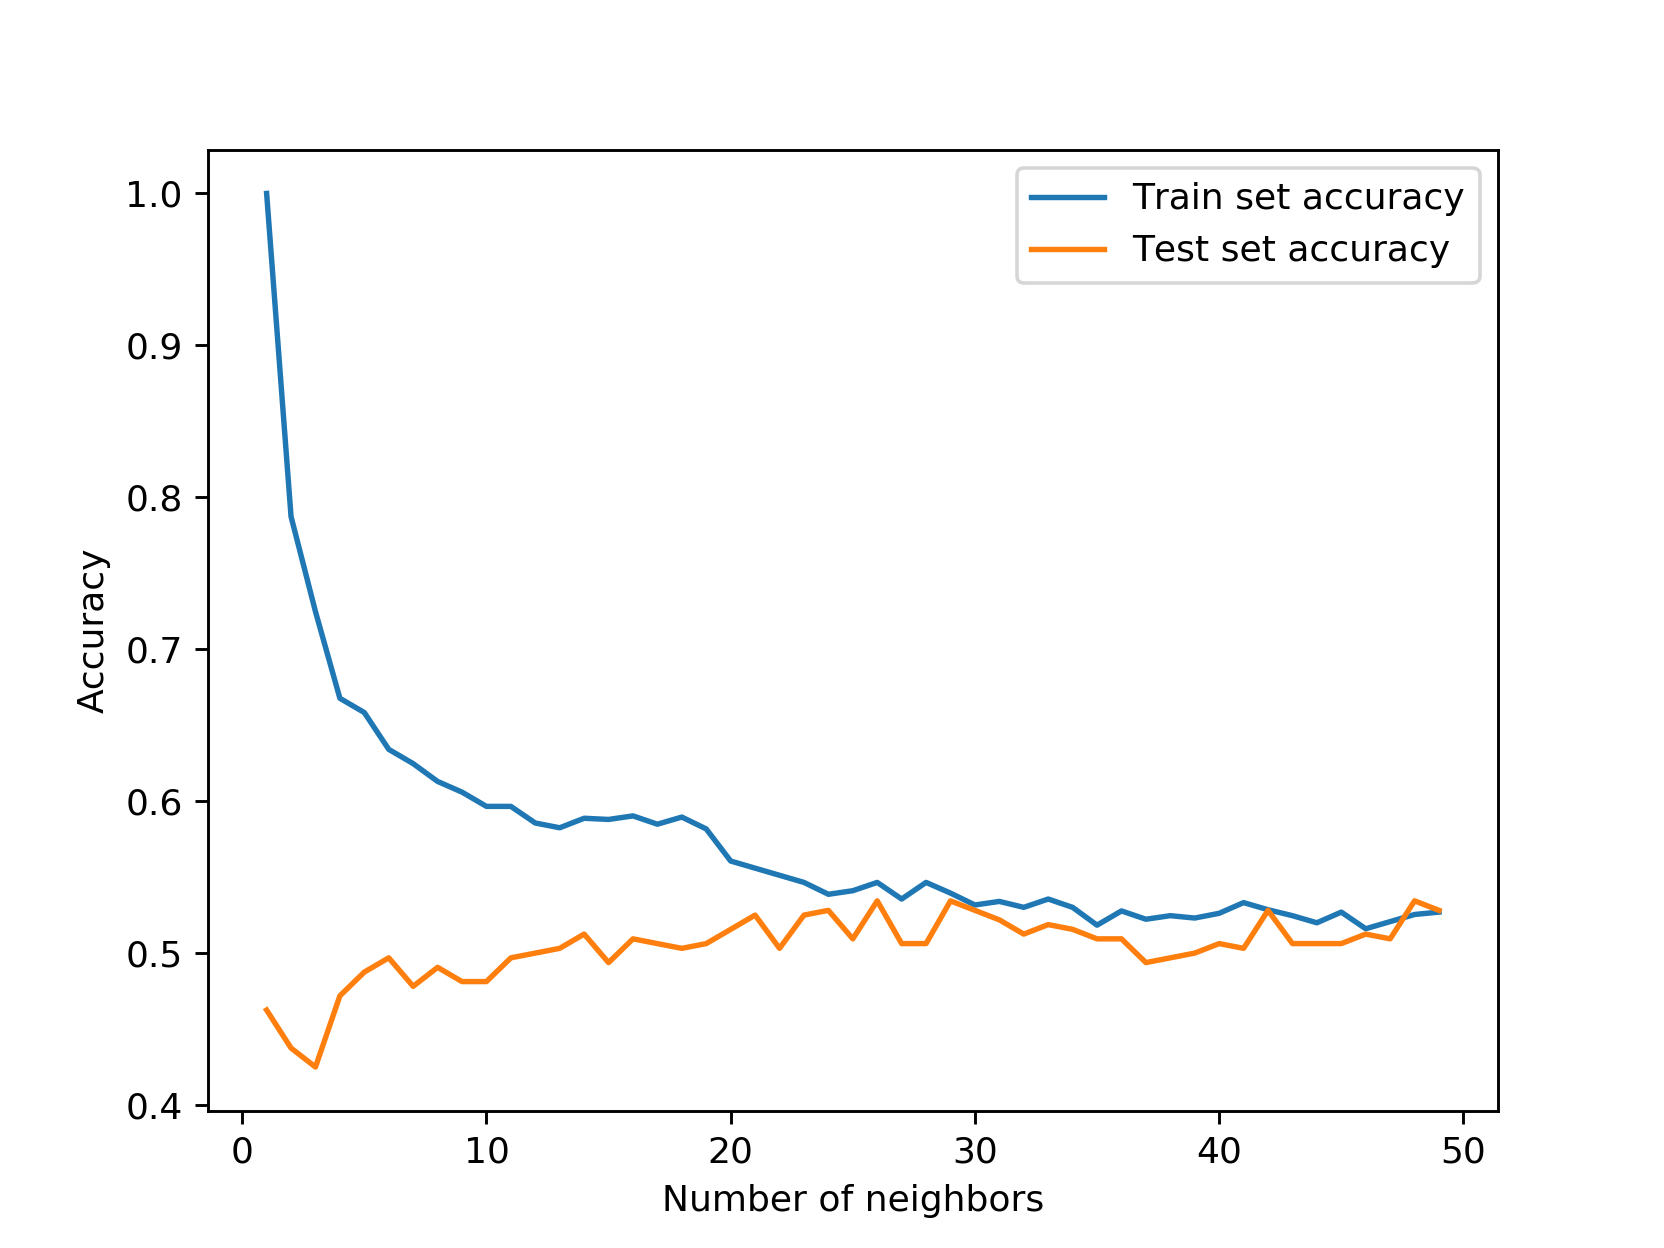

In [354]:

scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train_pca).transform(X_train_pca)
X_test_scaled = scaler.fit(X_test_pca).transform(X_test_pca)

train_accuracy = []
test_accuracy = []

neighbors = range(1,50)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train_red)
    train_accuracy.append(knn.score(X_train_scaled, y_train_red))
    test_accuracy.append(knn.score(X_test_scaled, y_test_red))
plt.plot(neighbors, train_accuracy, label = 'Train set accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test set accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
plt.show()

According to the second graph. After scaling the data, the accuracy of the model improved only about 4 points, It is time to try other models.

SVC:

<IPython.core.display.Javascript object>


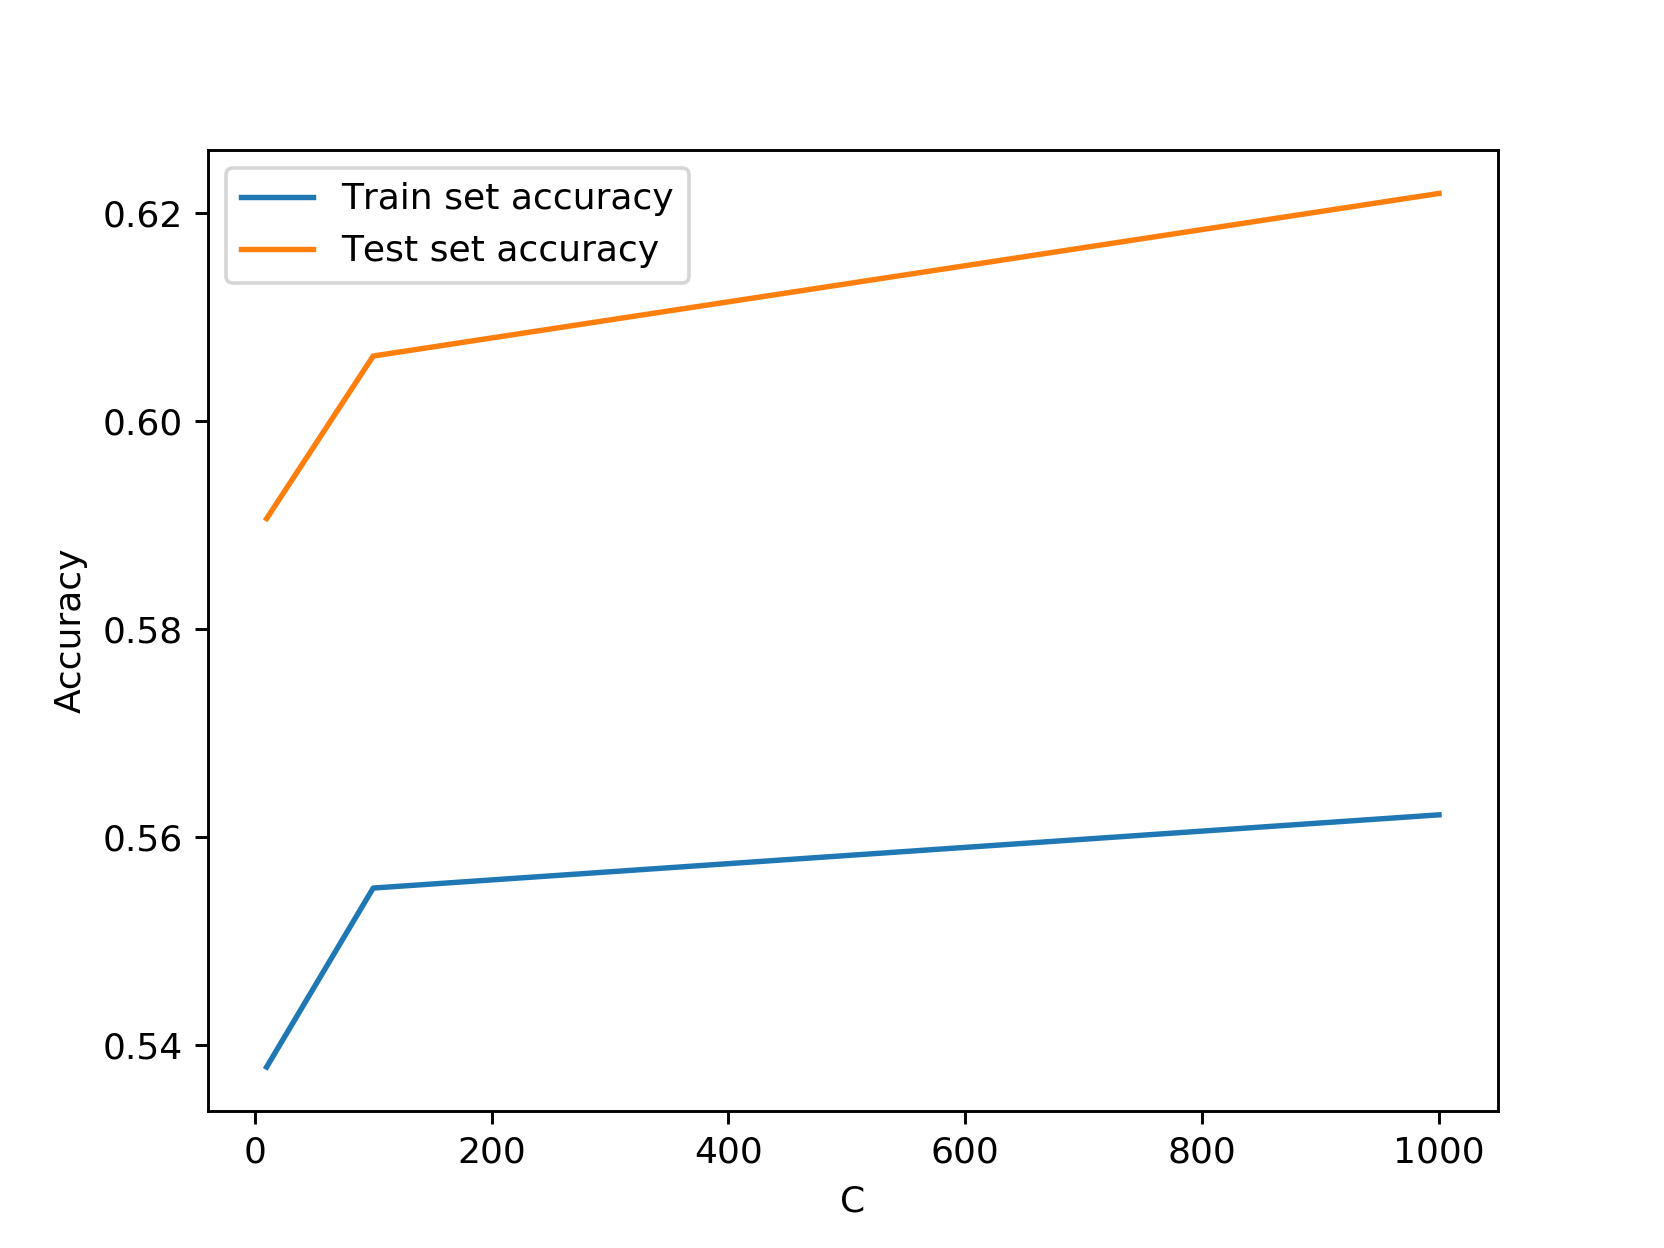

In [348]:
from sklearn.svm import SVC


#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train_pca).transform(X_train_pca)
X_test_scaled = scaler.fit(X_test_pca).transform(X_test_pca)

train_accuracy = []
test_accuracy = []

Ci = [10, 100, 1000]

for i in Ci:
    svm = SVC(C = i, kernel = 'poly' )
    svm.fit(X_train_scaled, y_train_red)
    train_accuracy.append(svm.score(X_train_scaled, y_train_red))
    test_accuracy.append(svm.score(X_test_scaled, y_test_red))
plt.plot(Ci, train_accuracy, label = 'Train set accuracy')
plt.plot(Ci, test_accuracy, label = 'Test set accuracy')
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()
plt.show()